# Matplotlib
Creating static plots using the matplotlib package in Python

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


List the available builtin styles, and choose one. If you don't specifically choose one style Matplotlib will use its default style. Use `plt.xkcd()` for plots which look like they are from comic books.

In [2]:
plt.style.use('ggplot')
# plt.xkcd() 

## Line Plots 

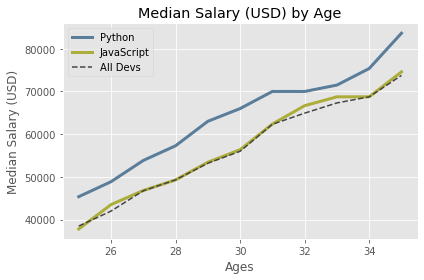

In [3]:
ages_x = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]

# Median Python Developer Salaries by Age
py_dev_y = [45372, 48876, 53850, 57287, 63016,
            65998, 70003, 70000, 71496, 75370, 83640]

plt.plot(ages_x, py_dev_y, color='#5a7d9a', linewidth=3, label='Python')

# Median JavaScript Developer Salaries by Age
js_dev_y = [37810, 43515, 46823, 49293, 53437,
            56373, 62375, 66674, 68745, 68746, 74583]

plt.plot(ages_x, js_dev_y, color='#adad3b', linewidth=3, label='JavaScript')

# Median Developer Salaries by Age
dev_y = [38496, 42000, 46752, 49320, 53200,
         56000, 62316, 64928, 67317, 68748, 73752]

plt.plot(ages_x, dev_y, color='#444444', linestyle='--', label='All Devs')

plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.title('Median Salary (USD) by Age')

plt.legend()

plt.grid(True)

plt.tight_layout()

plt.savefig('line_plot.png')

plt.show()

### Filling Area on Line Plots

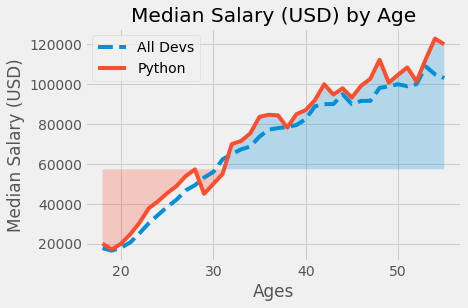

In [39]:
data = pd.read_csv('data_salaries.csv')
ages = data['Age']
dev_salaries = data['All_Devs']
py_salaries = data['Python']
js_salaries = data['JavaScript']
overall_median = 57287

plt.plot(ages, dev_salaries, linestyle='--', label='All Devs')
plt.plot(ages, py_salaries, label='Python')
plt.fill_between(ages, py_salaries, overall_median,
                where=(py_salaries > overall_median),
                interpolate=True, alpha=0.25)
plt.fill_between(ages, py_salaries, overall_median,
                where=(py_salaries <= overall_median),
                interpolate=True, alpha=0.25)
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.title('Median Salary (USD) by Age')
plt.legend()
plt.show()

We can also use a list as the `y2` argument instead of leaving it to its default value of 0. In the below example, we use the `dev_salaries` as the base to fill the area between `py_salaries` and `dev_salaries`.

In [ ]:
plt.plot(ages, dev_salaries, linestyle='--', label='All Devs')
plt.plot(ages, py_salaries, label='Python')
plt.fill_between(ages, py_salaries, dev_salaries,
                where=(py_salaries > dev_salaries),
                interpolate=True, alpha=0.25)
plt.fill_between(ages, py_salaries, dev_salaries,
                where=(py_salaries <= dev_salaries),
                interpolate=True, alpha=0.25)
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.title('Median Salary (USD) by Age')
plt.legend()
plt.show()

## Bar Charts

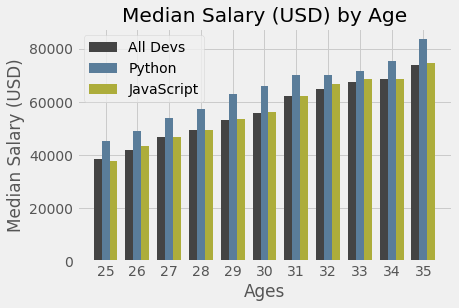

In [4]:
plt.style.use('fivethirtyeight')

x_indexes = np.arange(len(ages_x))
width = 0.25

plt.bar(x_indexes - width, dev_y, color='#444444', width=width, label='All Devs')
plt.bar(x_indexes, py_dev_y, color='#5a7d9a', width=width, label='Python')
plt.bar(x_indexes + width, js_dev_y, color='#adad3b', width=width, label='JavaScript')

plt.xticks(ticks=x_indexes, labels=ages_x)

plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.title('Median Salary (USD) by Age')

plt.legend()

plt.show()

### Get the data from a `.csv` file

In [5]:
import csv

with open('data.csv') as csv_file:
    csv_reader = csv.DictReader(csv_file)

    # Print the first row

    row = next(csv_reader)
    print(row)
    print(row['LanguagesWorkedWith'].split(';'))

OrderedDict([('Responder_id', '1'), ('LanguagesWorkedWith', 'HTML/CSS;Java;JavaScript;Python')])
['HTML/CSS', 'Java', 'JavaScript', 'Python']


A brief introduction to `Counter` here.

In [6]:
from collections import Counter

c = Counter(['Python', 'JavaScript'])
c


Counter({'Python': 1, 'JavaScript': 1})

In [7]:
c.update(['C++', 'Python'])
c

Counter({'Python': 2, 'JavaScript': 1, 'C++': 1})

In [8]:
c.update(['C++', 'Python'])
c

Counter({'Python': 3, 'JavaScript': 1, 'C++': 2})

Back to our csv data.

In [9]:
with open('data.csv') as csv_file:
    csv_reader = csv.DictReader(csv_file)

    language_counter = Counter()

    for row in csv_reader:
        language_counter.update(row['LanguagesWorkedWith'].split(';'))

print(language_counter.most_common(15))

[('JavaScript', 59219), ('HTML/CSS', 55466), ('SQL', 47544), ('Python', 36443), ('Java', 35917), ('Bash/Shell/PowerShell', 31991), ('C#', 27097), ('PHP', 23030), ('C++', 20524), ('TypeScript', 18523), ('C', 18017), ('Other(s):', 7920), ('Ruby', 7331), ('Go', 7201), ('Assembly', 5833)]


Let's say we are interested in the top 15 most common languages. Now we have to split the `keys` and `values` to their own lists.

In [10]:
languages = []
popularity = []

for item in language_counter.most_common(15):
    languages.append(item[0])
    popularity.append(item[1])

print(languages)
print(popularity)

['JavaScript', 'HTML/CSS', 'SQL', 'Python', 'Java', 'Bash/Shell/PowerShell', 'C#', 'PHP', 'C++', 'TypeScript', 'C', 'Other(s):', 'Ruby', 'Go', 'Assembly']
[59219, 55466, 47544, 36443, 35917, 31991, 27097, 23030, 20524, 18523, 18017, 7920, 7331, 7201, 5833]


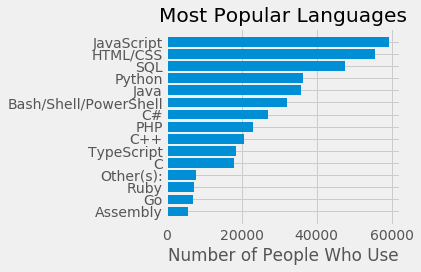

In [11]:
languages.reverse()
popularity.reverse()

plt.barh(languages, popularity)

plt.title("Most Popular Languages")
plt.xlabel("Number of People Who Use")

plt.tight_layout()

plt.show()

Faster way to load the data using `pandas`.

In [29]:
data = pd.read_csv('data.csv')
ids = data['Responder_id']
lang_responses = data['LanguagesWorkedWith']
print(lang_responses)

0                          HTML/CSS;Java;JavaScript;Python
1                                      C++;HTML/CSS;Python
2                                                 HTML/CSS
3                                      C;C++;C#;Python;SQL
4              C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA
                               ...                        
87564                             HTML/CSS;Java;JavaScript
87565                           HTML/CSS;JavaScript;Python
87566    Bash/Shell/PowerShell;Go;HTML/CSS;JavaScript;W...
87567                        HTML/CSS;JavaScript;Other(s):
87568    Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...
Name: LanguagesWorkedWith, Length: 87569, dtype: object


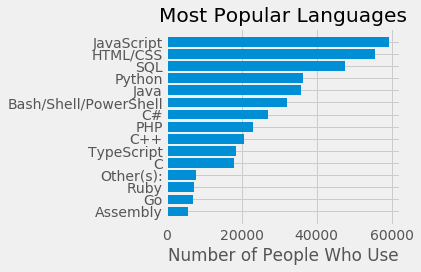

In [13]:
language_counter = Counter()

for response in lang_responses:
    language_counter.update(response.split(';'))

languages = []
popularity = []

for item in language_counter.most_common(15):
    languages.append(item[0])
    popularity.append(item[1])

languages.reverse()
popularity.reverse()

plt.barh(languages, popularity)

plt.title("Most Popular Languages")
plt.xlabel("Number of People Who Use")

plt.tight_layout()

plt.show()

## Pie Charts

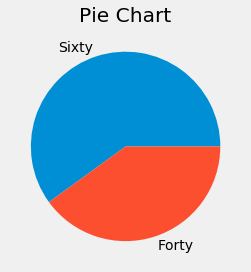

In [14]:
slices = [60, 40]
labels = ['Sixty', 'Forty']

plt.pie(slices, labels=labels)
plt.title("Pie Chart")
plt.tight_layout()
plt.show()

The slices don't have to add up to 100. Look at the below example where we doubled each slice.

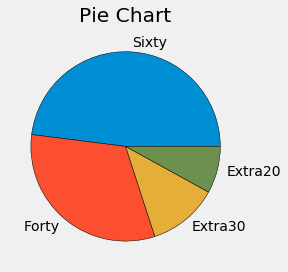

In [15]:
slices = [120, 80, 30 ,20]
labels = ['Sixty', 'Forty', 'Extra30', 'Extra20']
colors = ['blue', 'red', 'yellow', 'green']

plt.pie(slices, labels=labels, wedgeprops={'edgecolor':'black'})
plt.title("Pie Chart")
plt.tight_layout()
plt.show()

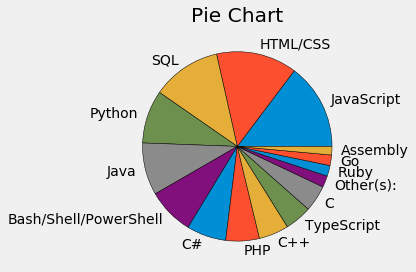

In [16]:
# Language Popularity
slices = [59219, 55466, 47544, 36443, 35917, 31991, 27097, 23030, 20524, 18523, 18017, 7920, 7331, 7201, 5833]
labels = ['JavaScript', 'HTML/CSS', 'SQL', 'Python', 'Java', 'Bash/Shell/PowerShell', 'C#', 'PHP', 'C++', 'TypeScript', 'C', 'Other(s):', 'Ruby', 'Go', 'Assembly']

plt.pie(slices, labels=labels, wedgeprops={'edgecolor':'black'})
plt.title("Pie Chart")
plt.tight_layout()
plt.show()

It is hard to interpret a pie chart with more than five slices. It gets crowded and makes it harder to make a comparison between the slices.

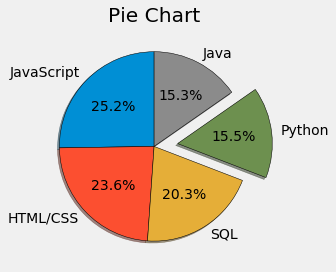

In [17]:
slices = [59219, 55466, 47544, 36443, 35917]
labels = ['JavaScript', 'HTML/CSS', 'SQL', 'Python', 'Java']
explode = [0, 0, 0, 0.25, 0]

plt.pie(slices, labels=labels, explode=explode, shadow=True, startangle=90, autopct='%1.1f%%', wedgeprops={'edgecolor':'black'})
plt.title("Pie Chart")
plt.tight_layout()
plt.show()

We can use `explode` argument to emphasize certain slices and set `shadow=True` for a 3d look alike visualization. `startangle` defines the starting position of the slice with the highest percentage and the rest of the slices are placed counterclockwise with respect to the first slice in descending order of their percentages. `autopct` argument is used to show the percentages inside the slices.

## Stack Plots (aka Area Plots)

Stack plots consider the aspect of time and try to visualize the contribution of an individual contributor over time.

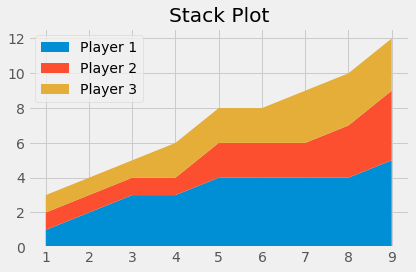

In [23]:
minutes = [1, 2, 3, 4, 5, 6, 7, 8, 9]

player1 = [1, 2, 3, 3, 4, 4, 4, 4, 5]
player2 = [1, 1, 1, 1, 2, 2, 2, 3, 4]
player3 = [1, 1, 1, 2, 2, 2, 3, 3, 3]

labels=["Player 1", "Player 2", "Player 3"]

plt.stackplot(minutes, player1, player2, player3, labels=labels)
plt.title("Stack Plot")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Another use case of a stack plot is to visualize what portion of the total work has been completed by each individual.

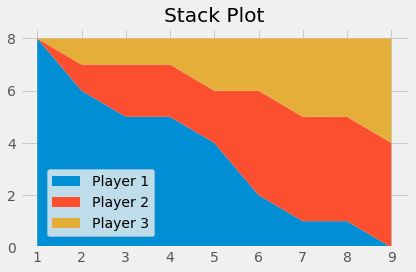

In [26]:
player1 = [8, 6, 5, 5, 4, 2, 1, 1, 0]
player2 = [0, 1, 2, 2, 2, 4, 4, 4, 4]
player3 = [0, 1, 1, 1, 2, 2, 3, 3, 4]

labels=["Player 1", "Player 2", "Player 3"]

plt.stackplot(minutes, player1, player2, player3, labels=labels)
plt.title("Stack Plot")
plt.legend(loc=(0.07, 0.05))
plt.tight_layout()
plt.show()